![irl](https://www.jobvacancyresult.com/storage/company/1976_innomatics.png)

# EDA on Dominos Dataset

## Name: Mohammad Wasiq

## E-mail: `mohammadwasiq0786@gmail.com`

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df= pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
# Numbers of Rows and Columns in the dataset
df.shape

(15000, 3)

In [4]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
# Watch the Missing values
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

**Great there is no missing value in this dataset.**

In [6]:
# Find the duplicate values
df.duplicated().sum()

0

**Nice! There is no duplicate value in this datset.** 

### Feature Engineering

In [7]:
# Convert the 'order_placed_at' and 'order_delivered_at' columns in datetime type because these columns are in date format

df['order_placed_at']= pd.to_datetime(df['order_placed_at'])

df['order_delivered_at']= pd.to_datetime(df['order_delivered_at'])

In [8]:
# Calculate the delivery time 
df['time_taken_for_delivery']= df['order_delivered_at'] - df['order_placed_at']
df['time_taken_for_delivery']= df['time_taken_for_delivery']/np.timedelta64(1,'m')

In [9]:
# Now again check the data type of the dataset's features
df.dtypes

order_id                            int64
order_placed_at            datetime64[ns]
order_delivered_at         datetime64[ns]
time_taken_for_delivery           float64
dtype: object

In [10]:
df['order_placed_date']= df['order_placed_at'].dt.date

In [11]:
df['order_placed_time']= df['order_placed_at'].dt.time

In [12]:
df['order_delivered_date']= df['order_delivered_at'].dt.date

In [13]:
df['order_delivered_time']= df['order_delivered_at'].dt.time

In [14]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056


Creating New Feature called time_period which will help to traffic of deliveries during differeent period of day

In [15]:
# Now create the 'time_period' column
df['time_period']= df['order_placed_at'].apply(lambda x: "Late Night" if x.hour > 1 and x.hour <= 4 else ("Morning" if x.hour > 4 and x.hour <= 12 else ("Afternoon" if x.hour > 12 and x.hour <= 16 else ("Evening" if x.hour > 16 and x.hour <= 19 else "Night"))))

In [16]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,Night
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,Night
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,Night
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,Night
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,Night


In [17]:
# countplot for 'time_period' column

df['time_period'].value_counts()

Morning       5002
Night         3785
Afternoon     2452
Evening       1889
Late Night    1872
Name: time_period, dtype: int64

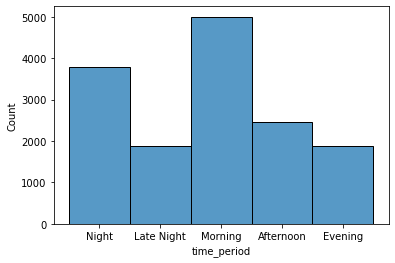

In [18]:
sns.histplot(df['time_period'])
plt.show()

## Report
* **During 4am to 12pm (`Morning`) around 5002 orders are placed, 3785 at `Night` and 2452 at `Afternoon`**

 ### Conclusion
* We can conclude that we should need more `delivery person` for **Morning** and **Afternoon** shift.

In [19]:
# Dropping feature 'order_placed_at' and 'order_delivered_at'

df.drop(['order_placed_at', 'order_delivered_at'], axis=1, inplace=True)

In [20]:
df.head()

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,Night
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,Night
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,Night
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,Night
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,Night


In [21]:
df.dtypes

order_id                     int64
time_taken_for_delivery    float64
order_placed_date           object
order_placed_time           object
order_delivered_date        object
order_delivered_time        object
time_period                 object
dtype: object

In [22]:
df['order_placed_day']= pd.to_datetime(df['order_placed_date']).dt.day_name()

In [23]:
df['order_delivered_day']= pd.to_datetime(df['order_delivered_date']).dt.day_name()

In [24]:
df.head()

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,Night,Wednesday,Wednesday
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,Night,Wednesday,Wednesday
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,Night,Wednesday,Wednesday
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,Night,Wednesday,Wednesday
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,Night,Wednesday,Wednesday


## Report 

**Anyways delivery time will never be more than `2Hr`** OR **We can conclude that Maximum Time taken by the delivery person is 2Hr**

If customer placed order at 23.50 delivary will be reached on next day that's why we created 'order_delivered_day' feature else 'order_placed_day' feature is enough.

In [25]:
# Countplot for 'order_placed_day'

df['order_placed_day'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_placed_day, dtype: int64

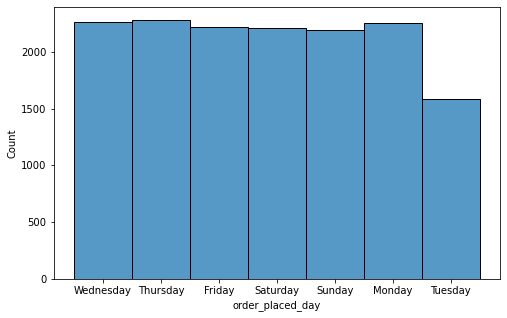

In [26]:
# countplot for feature order_placed_day
plt.figure(figsize= (8,5))
sns.histplot(df['order_placed_day'])
plt.show()

## Report

Except **Tuesday** all others day has appox equal number of ordered placed

On **Tuesday** we should give some discount or offers to customers to increase orders on that day.

In [27]:
df.head(1)

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,Night,Wednesday,Wednesday


In [28]:
df.dtypes

order_id                     int64
time_taken_for_delivery    float64
order_placed_date           object
order_placed_time           object
order_delivered_date        object
order_delivered_time        object
time_period                 object
order_placed_day            object
order_delivered_day         object
dtype: object

In [29]:
# analysing feature 'time_taken_for_delivery'

df['time_taken_for_delivery'].min()

15.000010333333334

**Minimum time taken to delivery is just `15 Min.`**

In [30]:
df['time_taken_for_delivery'].mean()

20.49938932646778

**Average time taken to delivery is just `20 Min.`**

In [31]:
df['time_taken_for_delivery'].median()

15.797986066666667

**Median time taken to delivery is just `15.8 Min.`**

In [32]:
df['time_taken_for_delivery'].max()

7299.831374933333

**Maximum time taken to delivery is just `7299.8 Min.`**

In [33]:
df['time_taken_for_delivery'].quantile(0.95)

27.261043996666658

**(95th Quartile of time taken to delivery is just `27.2 Min.`**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


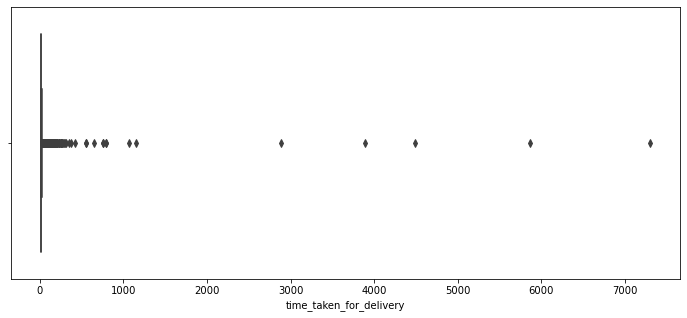

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(df['time_taken_for_delivery'])
plt.show()

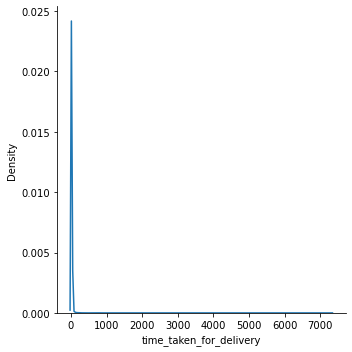

In [36]:
sns.displot(df['time_taken_for_delivery'], kind='kde')
plt.show()

In [39]:
count=0
for i in df['time_taken_for_delivery']:
    if i > 30.00:
        count=count+1
print(f"Out of 15k deliveries {count} deliveries are late")

Out of 15k deliveries 604 deliveries are late


**There are 604 Deliveries which are late out of 15,000.** OR **We can say that only 4% deliveries are late.**

In [40]:
df.shape

(15000, 9)

In [41]:
pd.set_option("display.max.rows", None)

df[df['time_taken_for_delivery'] > 1440]

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
4165,1527276,5867.434753,2023-03-08,09:46:43,2023-03-12,11:34:09.085175,Morning,Wednesday,Sunday
5499,1528610,7299.831375,2023-03-10,17:06:22,2023-03-15,18:46:11.882496,Evening,Friday,Wednesday
10007,1533118,2883.124250,2023-03-19,00:56:34,2023-03-21,00:59:41.454974,Night,Sunday,Tuesday
10225,1533336,4485.891210,2023-03-19,11:07:32,2023-03-22,13:53:25.472592,Morning,Sunday,Wednesday
14155,1537266,3888.444088,2023-03-26,09:54:24,2023-03-29,02:42:50.645252,Morning,Sunday,Wednesday


## Report 
* **Most orders (5002) are placed at morning time between `4am - 12pm`.**
* **Fastest order delivered in `15 Mins` (lowest time taken for one delivery)**
* **Highest time taken for one delivery is `7299 Mins` (might be chance this order is placed through IRCTC service and the delivery is missied after next station avalible dominos restaurant they delivered the order)**
* **Average time for one delivery is `20.49` Mins**
* $95\%$ **of the deliveries are delivered in time which is good for you Kanav sir**
* $4.02\%$ **deliveries are late which is less compare to on time delivered percentage**
* $5$ **deliveries took more than 1 Day time to delivered.**


## Conclusion:

* **We can put more delivery boys in morning and afternoon as the no. of orders are more.**
* **We can give some discount on Tuesday to increase the no.of order.**